In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("JC-202512-citibike-tripdata.csv")

# what is this data about

In [4]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,FBA120ADE8D22E7D,electric_bike,2025-12-26 10:20:09.188,2025-12-26 10:40:13.508,Lafayette Park,JC078,Vesey St & Greenwich St,5216.07,40.713464,-74.062859,40.712547,-74.011131,casual
1,DB8F52B8AE51DD28,electric_bike,2025-12-16 06:48:28.111,2025-12-16 06:56:10.969,Dr. Lena Edwards Park,JC117,Exchange Pl,JC116,40.713203,-74.058261,40.716366,-74.034344,member
2,C16D1CA1746E065F,electric_bike,2025-12-20 12:50:55.361,2025-12-20 12:58:32.234,Dr. Lena Edwards Park,JC117,Exchange Pl,JC116,40.713203,-74.058261,40.716366,-74.034344,member
3,7A613AF4BD6D75B9,electric_bike,2025-12-22 16:59:42.922,2025-12-22 17:04:29.327,JC Medical Center,JC110,Exchange Pl,JC116,40.715391,-74.049692,40.716366,-74.034344,casual
4,2448F2B5B85E52B1,electric_bike,2025-12-17 18:06:09.352,2025-12-17 18:14:13.548,Baldwin at Montgomery,JC020,Exchange Pl,JC116,40.723659,-74.064194,40.716366,-74.034344,member


In [5]:
df.shape

(48474, 13)

In [6]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48474 entries, 0 to 48473
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             48474 non-null  object 
 1   rideable_type       48474 non-null  object 
 2   started_at          48474 non-null  object 
 3   ended_at            48474 non-null  object 
 4   start_station_name  48474 non-null  object 
 5   start_station_id    48474 non-null  object 
 6   end_station_name    48122 non-null  object 
 7   end_station_id      47868 non-null  object 
 8   start_lat           48474 non-null  float64
 9   start_lng           48474 non-null  float64
 10  end_lat             47868 non-null  float64
 11  end_lng             47868 non-null  float64
 12  member_casual       48474 non-null  object 
dtypes: float64(4), object(9)
memory usage: 4.8+ MB


In [9]:
df.describe()

,start_lat,start_lng,end_lat,end_lng
count,48474.000000,48474.000000,47868.000000,47868.000000
mean,40.732425,-74.041159,40.732401,-74.040869
std,0.012013,0.013065,0.012049,0.013086
min,40.692220,-74.098110,40.692220,-74.098110
25%,40.721630,-74.046305,40.721525,-74.046305
50%,40.735938,-74.038051,40.735938,-74.038051
75%,40.742258,-74.030970,40.742258,-74.030900
max,40.754530,-74.024020,40.772370,-73.955736


# Exploration Summary
# 1] The dataset is consist of 48474 rows and 13 columns.
# 2] The dataset is desceribe as a ' a bit messy' with some NaNs and no duplicate values. 
# 3] The started_at and ended_at  need to cast into date-time formats to extract only year value. 

In [10]:
print(df.dtypes)

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object


In [11]:
df["started_at"]=pd.to_datetime(df["started_at"])
df["ended_at"]=pd.to_datetime(df["ended_at"])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48474 entries, 0 to 48473
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ride_id             48474 non-null  object        
 1   rideable_type       48474 non-null  object        
 2   started_at          48474 non-null  datetime64[ns]
 3   ended_at            48474 non-null  datetime64[ns]
 4   start_station_name  48474 non-null  object        
 5   start_station_id    48474 non-null  object        
 6   end_station_name    48122 non-null  object        
 7   end_station_id      47868 non-null  object        
 8   start_lat           48474 non-null  float64       
 9   start_lng           48474 non-null  float64       
 10  end_lat             47868 non-null  float64       
 11  end_lng             47868 non-null  float64       
 12  member_casual       48474 non-null  object        
dtypes: datetime64[ns](2), float64(4), object(7)
me

In [12]:
df.isnull().sum()

ride_id                 0
rideable_type           0
started_at              0
ended_at                0
start_station_name      0
start_station_id        0
end_station_name      352
end_station_id        606
start_lat               0
start_lng               0
end_lat               606
end_lng               606
member_casual           0
dtype: int64

In [13]:
# Naya column 'duration_minutes' banane ke liye
df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60
print(df[['started_at', 'ended_at', 'duration_minutes']].head())

               started_at                ended_at  duration_minutes
0 2025-12-26 10:20:09.188 2025-12-26 10:40:13.508         20.072000
1 2025-12-16 06:48:28.111 2025-12-16 06:56:10.969          7.714300
2 2025-12-20 12:50:55.361 2025-12-20 12:58:32.234          7.614550
3 2025-12-22 16:59:42.922 2025-12-22 17:04:29.327          4.773417
4 2025-12-17 18:06:09.352 2025-12-17 18:14:13.548          8.069933


In [14]:
# Duration ko minutes mein calculate karne ke liye
df['duration_minutes'] = (df['ended_at'] - df['started_at']).dt.total_seconds() / 60

# Average duration dekhne ke liye
print(f"Average Ride Duration: {df['duration_minutes'].mean():.2f} minutes")

Average Ride Duration: 10.96 minutes


In [15]:
# Jin rows mein important data missing hai unhe drop (remove) karein
df_clean = df.dropna(subset=['end_lat', 'end_lng', 'end_station_name'])

# Check karein ki ab kitne NULLs bache hain
print(df_clean.isnull().sum())

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
duration_minutes      0
dtype: int64


In [16]:
df.shape

(48474, 14)

Average Ride Duration (in minutes):
member_casual
casual    13.345461
member    10.516632
Name: duration_minutes, dtype: float64


<Axes: title={'center': 'Member vs Casual Ride Duration'}, xlabel='member_casual'>

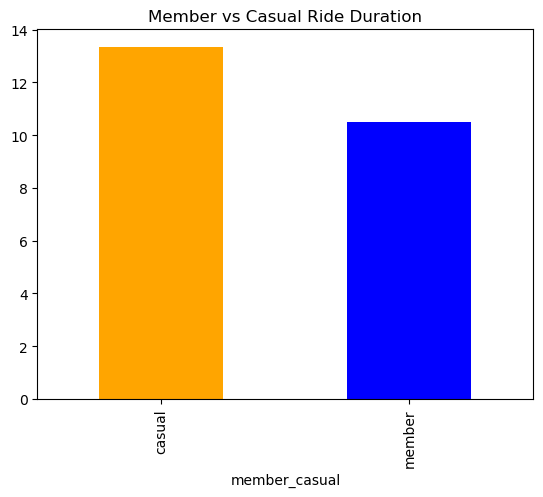

In [17]:
# User Type ke hisaab se average duration nikalne ke liye
user_comparison = df.groupby('member_casual')['duration_minutes'].mean()

print("Average Ride Duration (in minutes):")
print(user_comparison)

# Isko visualize karne ke liye ek chota plot
user_comparison.plot(kind='bar', color=['orange', 'blue'], title='Member vs Casual Ride Duration')

<Axes: xlabel='duration_minutes', ylabel='Count'>

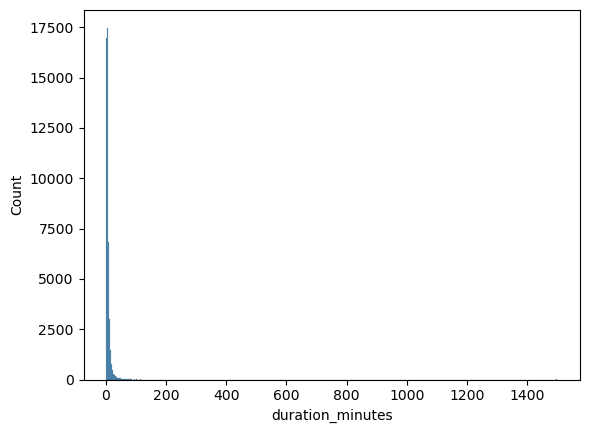

In [18]:
sns.histplot(df["duration_minutes"])

In [19]:
# Hour nikalne ke liye (0 to 23)
df['hour'] = df['started_at'].dt.hour

# Day ka naam nikalne ke liye (Monday, Tuesday, etc.)
df['day_of_week'] = df['started_at'].dt.day_name()

# Check karein naye columns
print(df[['started_at', 'hour', 'day_of_week']].head())

               started_at  hour day_of_week
0 2025-12-26 10:20:09.188    10      Friday
1 2025-12-16 06:48:28.111     6     Tuesday
2 2025-12-20 12:50:55.361    12    Saturday
3 2025-12-22 16:59:42.922    16      Monday
4 2025-12-17 18:06:09.352    18   Wednesday


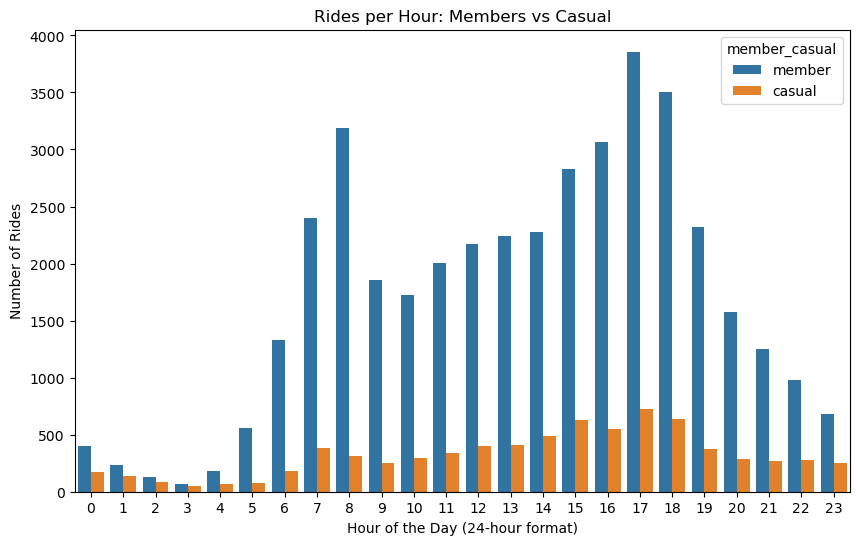

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='hour', hue='member_casual')
plt.title('Rides per Hour: Members vs Casual')
plt.xlabel('Hour of the Day (24-hour format)')
plt.ylabel('Number of Rides')
plt.show()

In [25]:
!pip install folium
import folium
from folium.plugins import HeatMap

# 1. Base map banayein (Jersey City ke coordinates par)
m = folium.Map(location=[40.73, -74.04], zoom_start=13)

# 2. Heatmap ke liye data prepare karein (lat, lng)
# Hum un rows ko le rahe hain jahan coordinates missing nahi hain
heat_data = [[row['start_lat'], row['start_lng']] for index, row in df.dropna(subset=['start_lat', 'start_lng']).iterrows()]

# 3. HeatMap add karein
HeatMap(heat_data[:1000]).add_to(m) # Pehle 1000 records ke liye

# Map display karein
m

Defaulting to user installation because normal site-packages is not writeable


In [26]:
# 1. Sirf 'member' type ka data filter karein
member_df = df[df['member_casual'] == 'member']

# 2. Base map banayein (Jersey City location)
m_member = folium.Map(location=[40.73, -74.04], zoom_start=13)

# 3. Heatmap ke liye data prepare karein (Sirf Members ka)
# Hum NaN values ko drop kar rahe hain taaki error na aaye
member_heat_data = [[row['start_lat'], row['start_lng']] 
                    for index, row in member_df.dropna(subset=['start_lat', 'start_lng']).iterrows()]

# 4. HeatMap add karein (Pehle 10000 points tak dikha sakte hain accuracy ke liye)
HeatMap(member_heat_data[:10000]).add_to(m_member)

# Map display karein
m_member

In [24]:
df.to_csv("CitiBike_EDA_Project",index = False)